# Predict the Selling Price of the Car

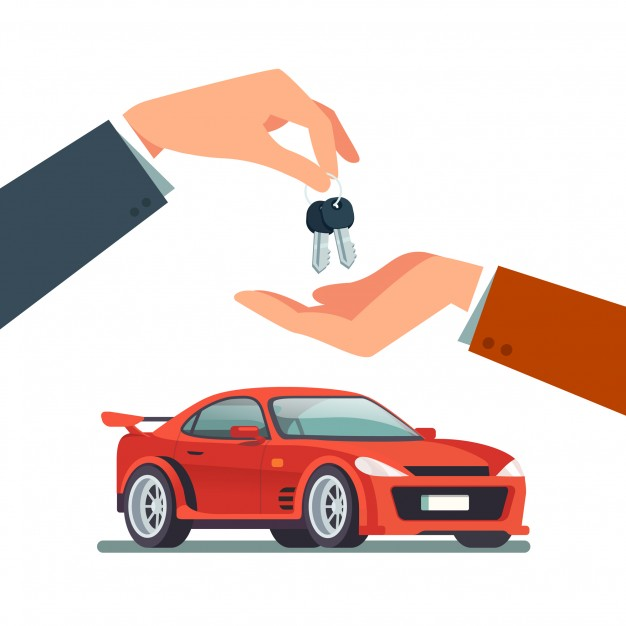

Columns in data set:

* name = Name of the car
* year = Year of manufacture of the car
* selling_price = Sale price
* km_driven = The kilometer traveled by the car
* fuel = Fuel type
* seller_type = Seller type
* transmission =Gear type of car
*  Owner =Owner

I will examine the data set and estimate the price of the car using Linear Regression and Random Forest Regressor algorithms.

TABLE OF CONTENTS

1-)Importing Libraries And Importing Data

2-)Exploratory Data Analysis

3-)Outlier Detection

4-)One Hot Encoding

5-)Split Data

6-)Build Model And Accurcy Value

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1-)Import Library and Data

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder 
filterwarnings("ignore")



In [ ]:
data = pd.read_csv("../input/vehicle-dataset-from-cardekho/car data.csv")


In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.info()

We haven't got null value.

In [ ]:
data.describe().T

# 2-)Exploratory Data Analysis¶

In [ ]:
corr_matrix =data.corr()
sns.clustermap(corr_matrix,annot=True,fmt=".2f")
plt.show()

In [ ]:
sns.pairplot(data)

In [ ]:
data.corrwith(data["Selling_Price"])

In [ ]:
plt.plot(data["Present_Price"],data["Selling_Price"], 'o')
plt.xlabel("Present_Price")
plt.ylabel("Selling_Price")
plt.show()


In [ ]:
plt.plot(data["Year"],data["Selling_Price"], 'o',color ='red')
plt.xlabel("Year")
plt.ylabel("Selling_Price")
plt.show()

In [ ]:
plt.plot(data["Kms_Driven"],data["Selling_Price"], 'o',color ='green')
plt.xlabel("Kms_Driven")
plt.ylabel("Selling_Price")


plt.show()

In [ ]:
plt.plot(data["Owner"],data["Selling_Price"], 'o',color ='black')
plt.xlabel("Owner")
plt.ylabel("Selling_Price")
plt.show()

# 3-)Outlier Detection

In [ ]:
plt.figure(figsize=[14,10])
plt.subplot(2,2,1)
sns.boxplot(x='Selling_Price',data=data,color="blue")
plt.subplot(2,2,2)
sns.boxplot(x='Year',data=data,color="red")
plt.subplot(2,2,3)
sns.boxplot(x='Present_Price',data=data,color="pink")
plt.subplot(2,2,4)
sns.boxplot(x='Kms_Driven',data=data,color="green")

plt.show()

****Eliminate Outliers****

* Selling_Price

In [ ]:
sp_out=data["Selling_Price"]
sns.boxplot(y=data["Selling_Price"] )
plt.show()



q1_sp_out=sp_out.quantile(0.25) #Creatine phosphokinase  0.25 th value
q3_sp_out =sp_out.quantile(0.70)#Creatine phosphokinase  0.75 th value

print(q1_sp_out)
print(q3_sp_out)

In [ ]:
igr_sp_out = q3_sp_out - q1_sp_out
low_lim_sp_out = q1_sp_out - 1.5 * igr_sp_out #lower limit
up_lim_sp_out = q3_sp_out + 1.5 * igr_sp_out #upper limit


print(igr_sp_out)
print(low_lim_sp_out)
print(up_lim_sp_out)

In [ ]:
sp_out_mean=4.661296
sp_out[((sp_out>(up_lim_sp_out)) | (sp_out<(low_lim_sp_out)))]=sp_out_mean


print(data["Selling_Price"])
sns.boxplot(y=data["Selling_Price"] )
plt.show()

* Year

In [ ]:
y_out=data["Year"]
sns.boxplot(y=data["Year"] )
plt.show()



q1_y_out=y_out.quantile(0.25) #Creatine phosphokinase  0.25 th value
q3_y_out =y_out.quantile(0.72)#Creatine phosphokinase  0.75 th value

print(q1_y_out)
print(q3_y_out)

In [ ]:
igr_y_out =q3_y_out-q1_y_out
low_lim_y_out = q1_y_out - 1.5 * igr_y_out #lower limit
up_lim_y_out = q3_y_out + 1.5 * igr_y_out #upper limit


print(igr_y_out)
print(low_lim_y_out)
print(up_lim_y_out)

In [ ]:
y_out_mean=2013.627907
y_out[((y_out>(up_lim_y_out)) | (y_out<(low_lim_y_out)))]=y_out_mean


print(data["Year"])
sns.boxplot(y=data["Year"] )
plt.show()

* Present_Price

In [ ]:
pc_out=data["Present_Price"]
sns.boxplot(y=data["Present_Price"] )
plt.show()



q1_pc_out=pc_out.quantile(0.25) #Creatine phosphokinase  0.25 th value
q3_pc_out =pc_out.quantile(0.72)#Creatine phosphokinase  0.75 th value

print(q1_pc_out)
print(q3_pc_out)

In [ ]:
igr_pc_out = q3_pc_out - q1_pc_out
low_lim_pc_out = q1_pc_out - 1.5 * igr_pc_out #lower limit
up_lim_pc_out = q3_pc_out + 1.5 * igr_pc_out #upper limit


print(igr_pc_out)
print(low_lim_pc_out)
print(up_lim_pc_out)

In [ ]:
pc_out_mean=7.628472
pc_out[((pc_out>(up_lim_pc_out)) | (pc_out<(low_lim_pc_out)))]=pc_out_mean


print(data["Year"])
sns.boxplot(y=data["Year"] )
plt.show()

* Kms_Driven

In [ ]:
kd_out=data["Kms_Driven"]
sns.boxplot(y=data["Kms_Driven"] )
plt.show()



q1_kd_out=kd_out.quantile(0.25) #Creatine phosphokinase  0.25 th value
q3_kd_out =kd_out.quantile(0.72)#Creatine phosphokinase  0.75 th value

print(q1_kd_out)
print(q3_kd_out)

In [ ]:
igr_kd_out = q3_kd_out - q1_kd_out
low_lim_kd_out = q1_kd_out - 1.5 * igr_kd_out #lower limit
up_lim_kd_out = q3_kd_out + 1.5 * igr_kd_out #upper limit


print(igr_kd_out)
print(low_lim_kd_out)
print(up_lim_kd_out)

In [ ]:
kd_out_mean=36947.205980
kd_out[((kd_out>(up_lim_kd_out)) | (kd_out<(low_lim_kd_out)))]=kd_out_mean


print(data["Kms_Driven"])
sns.boxplot(y=data["Kms_Driven"] )
plt.show()

# 4-)One Hot Encoding

In [ ]:

lbe=LabelEncoder()
data["Seller_Type"]=lbe.fit_transform(data["Seller_Type"])
data["Fuel_Type"]=lbe.fit_transform(data["Fuel_Type"])
data["Transmission"]=lbe.fit_transform(data["Transmission"])
data =data.drop(["Car_Name"],axis=1)


data["Seller_Type"] =data["Seller_Type"].astype(str)
data["Fuel_Type"] =data["Fuel_Type"].astype(str)
data["Transmission"] =data["Transmission"].astype(str)
data=pd.get_dummies(data)
print(data)

# 5-)Split Data

In [ ]:


y = data["Selling_Price"]
x=data.drop(["Selling_Price"],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)



print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)


# 6-) Build Model And Accurcy Value¶

LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model = LinearRegression().fit(x_train,y_train)
print(model.score(x_train,y_train))


y_pred =model.predict(x_test)


print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


pred=pd.DataFrame(y_pred)

plt.figure(figsize = (18, 6))
index=y_test.reset_index()["Selling_Price"]
ax=index.plot(label="original values")
ax=pred[0].plot(label = "predicted values")
plt.legend(loc='upper right')
plt.title("Test vs Pred")
plt.xlabel("indexes")
plt.ylabel("values")
plt.show()


RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model2=RandomForestRegressor().fit(x_train,y_train)
print(model2.score(x_train,y_train))

y_pred2=model2.predict(x_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))


pred2=pd.DataFrame(y_pred2)


plt.figure(figsize = (18, 6))
index=y_test.reset_index()["Selling_Price"]
ax=index.plot(label="original values")
ax=pred2[0].plot(label = "predicted values")
plt.legend(loc='upper right')
plt.title("Test vs Pred")
plt.xlabel("indexes")
plt.ylabel("values")
plt.show()